In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
employee_df = pd.read_csv('employee_simulated.csv')
employee_df

,Employee_ID,Age,Tenure,BaseSalary,PeerPromotion%,LearningHours,DailyMessageSentiments_AVE_day0,DailyMessageSentiments_AVE_day1,DailyMessageSentiments_AVE_day2,DailyMessageSentiments_AVE_day3,...,DailyMessageSentiments_AVE_day111,DailyMessageSentiments_AVE_day112,DailyMessageSentiments_AVE_day113,DailyMessageSentiments_AVE_day114,DailyMessageSentiments_AVE_day115,DailyMessageSentiments_AVE_day116,DailyMessageSentiments_AVE_day117,DailyMessageSentiments_AVE_day118,DailyMessageSentiments_AVE_day119,Churn
0,49enyq3f68,46,16,22297.90,12.0,59.96,1.000000,1.000000,1.000000,0.893180,...,0.672978,0.610869,0.561481,0.712522,0.616439,0.585162,0.675012,0.620773,0.651453,0
1,Qz2hHt928k,42,16,73171.35,61.0,41.78,-0.035134,-0.030404,-0.014763,-0.018234,...,0.271115,0.266469,0.274244,0.269494,0.286577,0.296829,0.277267,0.290416,0.298919,0
2,YMxtGNu8YE,38,17,43109.33,48.0,230.24,-0.065050,-0.062507,-0.065925,-0.064758,...,0.055852,0.059718,0.057807,0.060356,0.052578,0.059270,0.064776,0.066166,0.063612,0
3,0XLmvINKHt,40,16,23947.04,54.0,198.46,0.982804,0.918169,0.981118,0.999025,...,0.021570,0.034993,0.036051,0.033556,0.039972,0.039057,0.037208,0.040451,0.032267,0
4,P3hRIehLkU,34,1,25290.71,27.0,306.54,-0.011993,-0.010910,-0.012030,-0.011384,...,0.051721,-0.012192,0.123380,-0.076274,-1.028342,-0.961033,-0.800584,-0.990578,-1.080156,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,IUthdQw1WY,38,30,40495.92,16.0,88.17,0.962653,1.000000,0.979278,0.970863,...,1.000000,1.000000,1.000000,0.987003,0.866157,0.909108,0.940954,0.891617,0.838709,0
199996,YDhvFDA60E,29,34,31591.69,9.0,20.22,-0.060328,-0.057498,-0.052829,-0.052960,...,0.096268,0.091480,0.095022,0.101019,0.094671,0.098814,0.105329,0.098463,0.101054,0
199997,88LeZBpoBZ,37,29,28506.25,35.0,89.34,0.876971,0.893165,0.996465,0.991249,...,-0.184585,-0.231746,-0.306130,-0.399770,-0.427001,-0.532166,-0.560112,-0.597941,-0.543848,0
199998,6Eh3CzIkTe,32,11,86394.68,62.0,136.33,-0.082974,-0.103535,-0.120125,-0.123393,...,0.378485,0.381952,0.413119,0.325471,0.319343,0.433666,0.425316,0.380957,0.356446,0


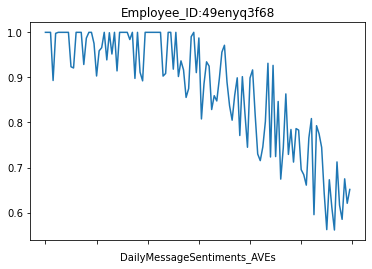

In [48]:
y = employee_df.loc[0,'DailyMessageSentiments_AVE_day0':'DailyMessageSentiments_AVE_day119']
ax = y.plot()
ax.set_xticklabels([])
ax.set_xlabel('DailyMessageSentiments_AVEs')
ax.set_title(f'Employee_ID:{employee_df.loc[0,"Employee_ID"]}')
plt.savefig(f'images/DailyMessageSentiments_AVEs_Employee_ID_{employee_df.loc[8,"Employee_ID"]}.png',dpi=500)

In [51]:
import numpy as np
from scipy.optimize import curve_fit

def r2(y,y_fit):
    TSS = (y**2).sum()
    RSS = ((y-y_fit)**2).sum()
    return 1- RSS/TSS

def func1par(x,p1):
    return p1

def func2par(x,p1,p2):
    return p1 + p2*x

def func3par(x,p1,p2,p3):
    return p1 + p2*x + p3*x**2

funcs = [func1par,func2par,func3par]

In [53]:
y = employee_df.loc[0,'DailyMessageSentiments_AVE_day0':'DailyMessageSentiments_AVE_day119']
x = np.arange(len(y))

for i in range(3):
    ps, _ = curve_fit(funcs[i], x, y)
    
    if i == 0:
        y_fit = funcs[i](x,ps[0])
    if i == 1:
        y_fit = funcs[i](x,ps[0],ps[1])
    if i == 2:
        y_fit = funcs[i](x,ps[0],ps[1],ps[2])
        
    r2_score = r2(y,y_fit)
    
    
    print(r2_score)

0.9796586191116987
0.994279849468281
0.9960933736458761


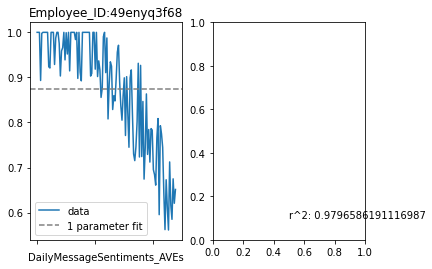

0.9796586191116987


In [21]:


y = employee_df.loc[0,'DailyMessageSentiments_AVE_day0':'DailyMessageSentiments_AVE_day119']
y_fit = pd.Series(y.mean(),index =y.index)
r2_score = r2(y,y_fit)

fig, axs = plt.subplots(1, 2)
ax = axs[0]
y.plot(label='data',ax=ax)
ax.axhline(y.mean(),label = '1 parameter fit',c='gray',linestyle='--')

ax.set_xticklabels([])
ax.set_xlabel('DailyMessageSentiments_AVEs')
ax.set_title(f'Employee_ID:{employee_df.loc[0,"Employee_ID"]}')
ax.legend()

ax = axs[1]
ax.annotate(xy=(0.5,0.1),text=f'r^2: {r2_score}')

plt.show()
print(r2(y,y_fit))

In [49]:
y

DailyMessageSentiments_AVE_day0      0.953266
DailyMessageSentiments_AVE_day1       0.89602
DailyMessageSentiments_AVE_day2      0.876465
DailyMessageSentiments_AVE_day3      0.901759
DailyMessageSentiments_AVE_day4       0.89633
                                       ...   
DailyMessageSentiments_AVE_day115    0.109682
DailyMessageSentiments_AVE_day116    0.102939
DailyMessageSentiments_AVE_day117    0.104954
DailyMessageSentiments_AVE_day118    0.101165
DailyMessageSentiments_AVE_day119     0.10421
Name: 8, Length: 120, dtype: object

In [51]:
y_fit

DailyMessageSentiments_AVE_day0      0.76538
DailyMessageSentiments_AVE_day1      0.76538
DailyMessageSentiments_AVE_day2      0.76538
DailyMessageSentiments_AVE_day3      0.76538
DailyMessageSentiments_AVE_day4      0.76538
                                      ...   
DailyMessageSentiments_AVE_day115    0.76538
DailyMessageSentiments_AVE_day116    0.76538
DailyMessageSentiments_AVE_day117    0.76538
DailyMessageSentiments_AVE_day118    0.76538
DailyMessageSentiments_AVE_day119    0.76538
Length: 120, dtype: float64

In [40]:
f'Employee_ID:{employee_df.loc[8,"Employee_ID"]}'

'Employee_ID:o1a2vgdDhP'

'o1a2vgdDhP'

0


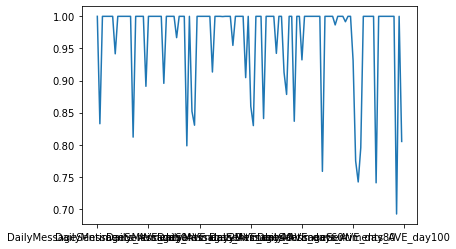

1


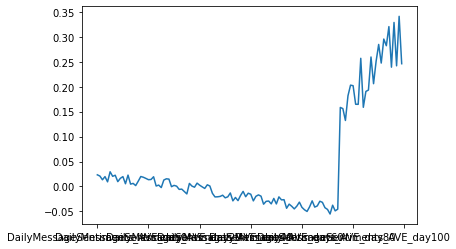

2


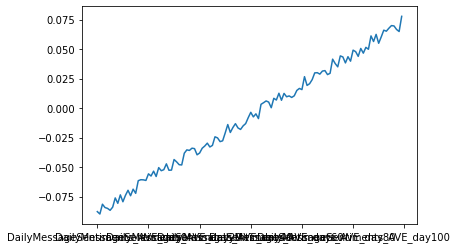

3


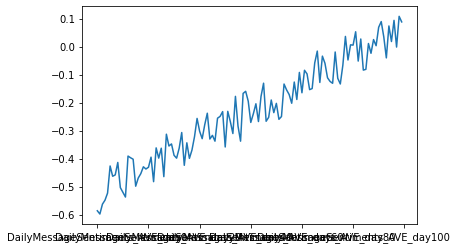

4


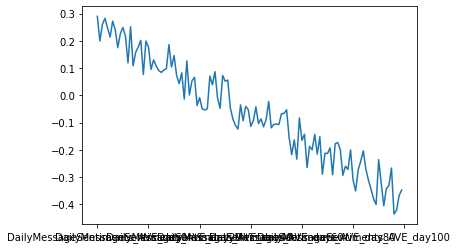

5


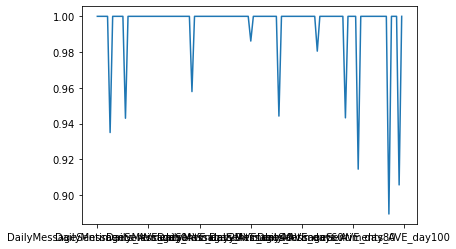

6


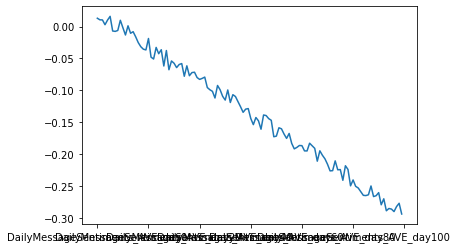

7


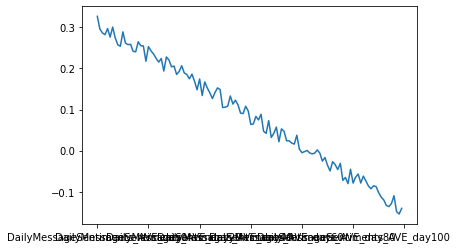

8


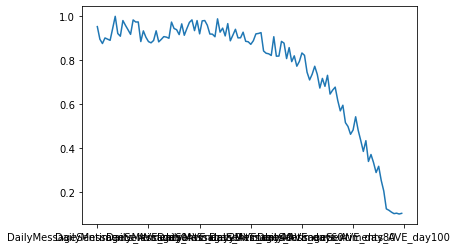

9


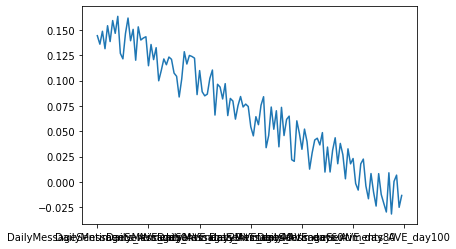

10


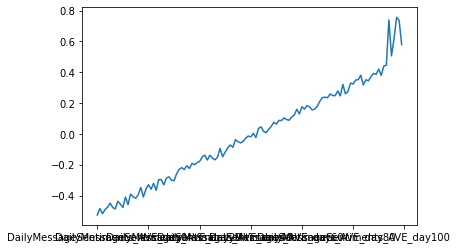

11


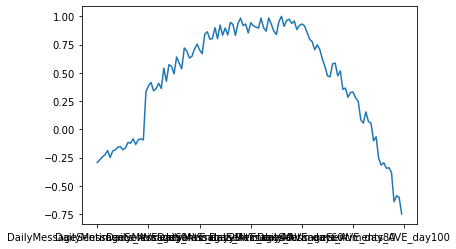

12


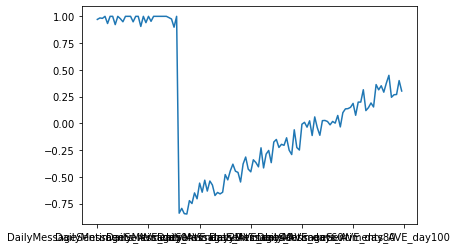

13


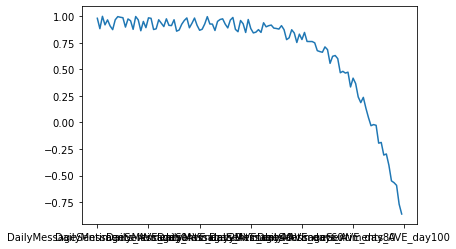

14


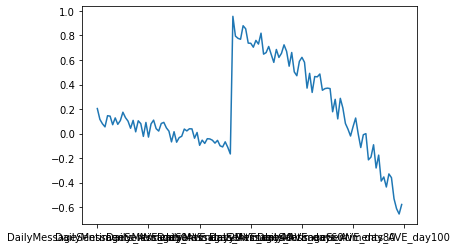

15


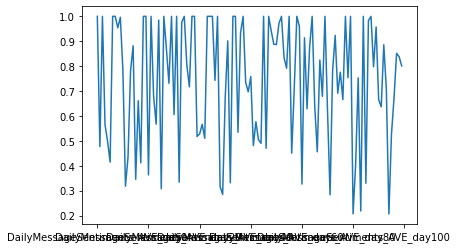

16


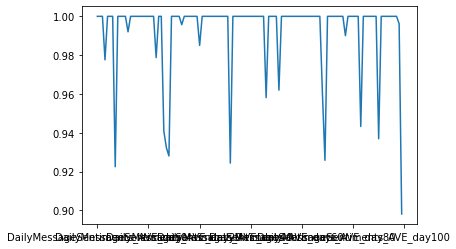

17


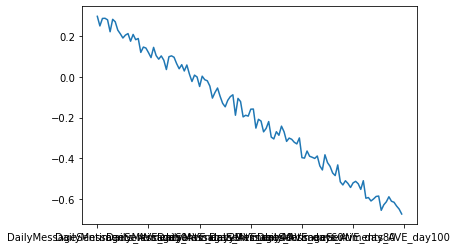

18


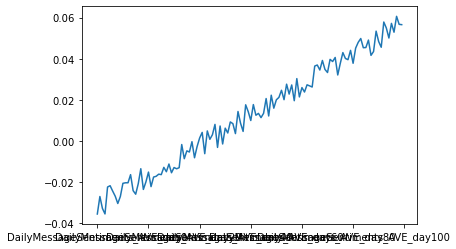

19


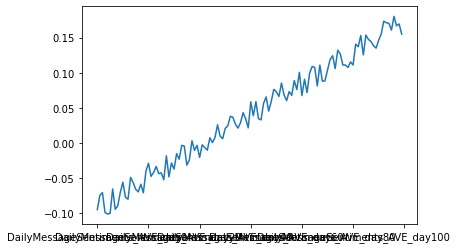

20


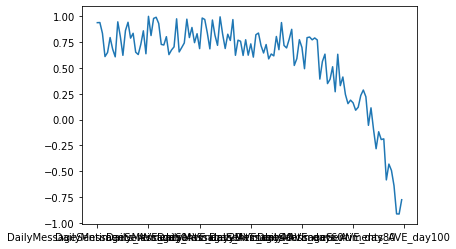

21


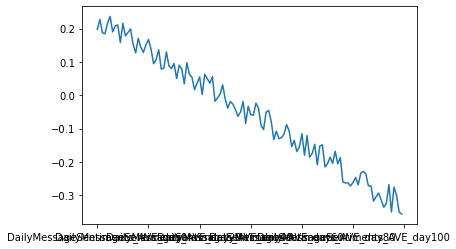

22


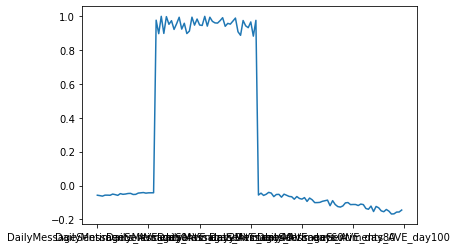

23


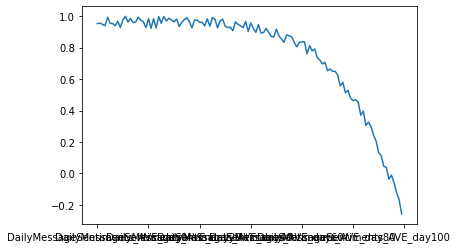

24


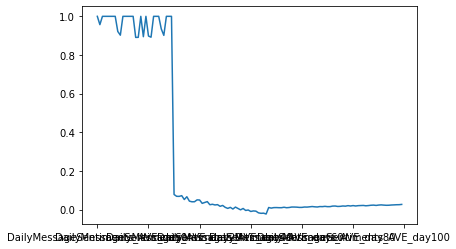

25


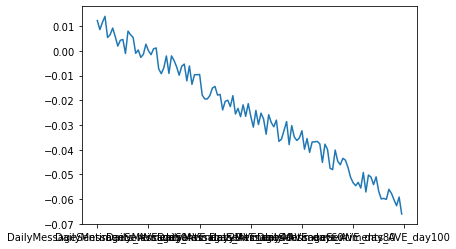

26


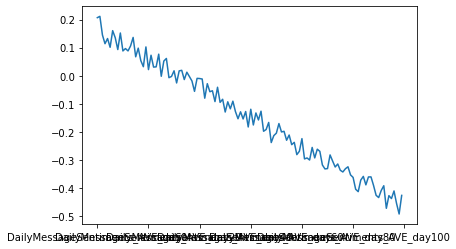

27


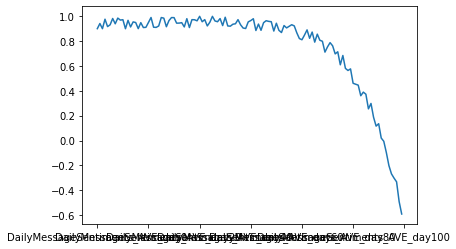

28


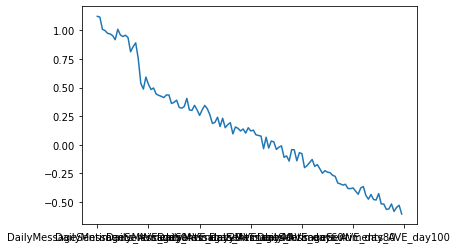

29


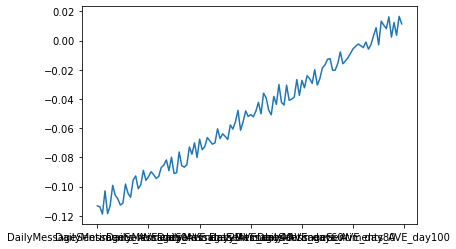

30


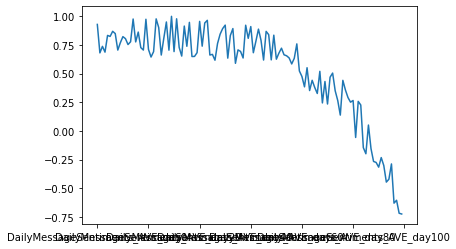

31


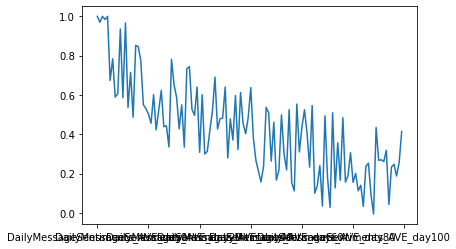

32


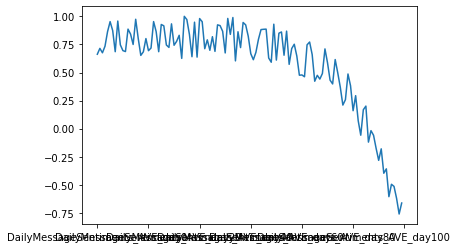

33


KeyboardInterrupt: 

In [10]:
for i,row in employee_df.iterrows():
    print(i)
    row.loc['DailyMessageSentiments_AVE_day0':'DailyMessageSentiments_AVE_day119'].plot()
    plt.xticks('r')
    plt.show()